In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from GetData import O3_BBH, O4_BBH
import pandas as pd

c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:142: SettingWithCopyWarning: 
A value is trying

In [2]:
raw_o4 = pd.read_csv("C:/Users/lucas/GraveTeamMain/Gravitational-Waves-Research-23-24/Data/Wiki_Ligo_O4.csv")
raw_o4 = raw_o4[raw_o4["Luminosity Distance"] != "?"]

In [3]:
LD = raw_o4["Luminosity Distance"]
raw_o4["Luminosity Distance Error"] = np.array([float(str(d).split("±")[1]) for d in LD])
raw_o4["Luminosity Distance"] = np.array([float(str(d).split("±")[0]) for d in LD])

In [17]:
overlap = 0.0
values = np.zeros(len(O4_BBH["M_tot"]))
values2 = np.zeros(len(O4_BBH["M_tot"]))
count = len(raw_o4["Luminosity Distance"])
for name in raw_o4["GW event"]:
    #print(name, O4_BBH["eventid"])
    for i in range(len(O4_BBH["eventid"])):
        id = O4_BBH["eventid"][i]
        if id == name:
            values[i] = raw_o4["Luminosity Distance"][i]
            values2[i] = raw_o4["Luminosity Distance Error"][i]
            overlap += 1
            break

print(int(overlap), overlap / count)
O4_BBH["luminosity_distance"] = values
O4_BBH["Luminosity Distance Error"] = values2

80 0.5333333333333333


C:\Users\lucas\AppData\Local\Temp\ipykernel_15208\3154392235.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH["luminosity_distance"] = values
C:\Users\lucas\AppData\Local\Temp\ipykernel_15208\3154392235.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH["Luminosity Distance Error"] = values2


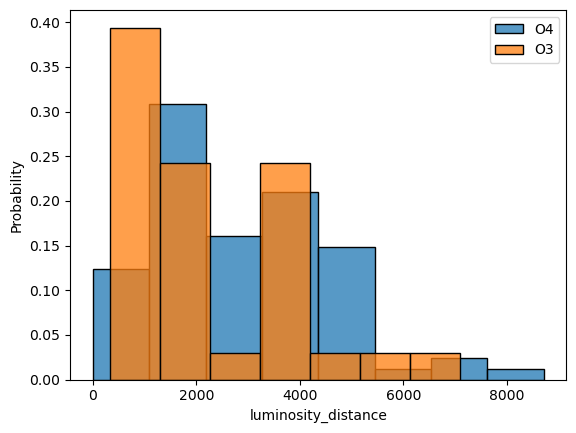

In [23]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="probability", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="probability", label="O3")
plt.legend()
plt.show()

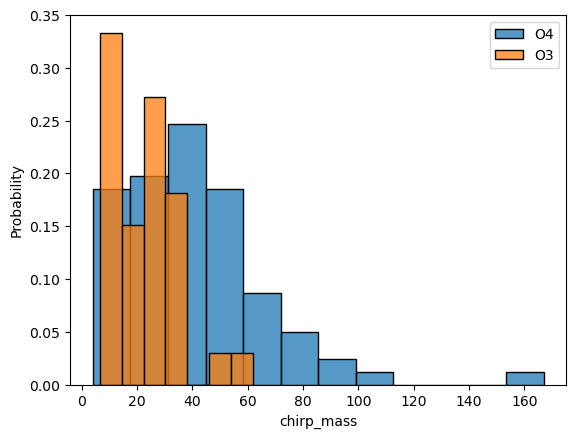

In [24]:
sns.histplot(O4_BBH, x="chirp_mass", stat="probability", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="probability", label="O3")
plt.legend()
plt.show()

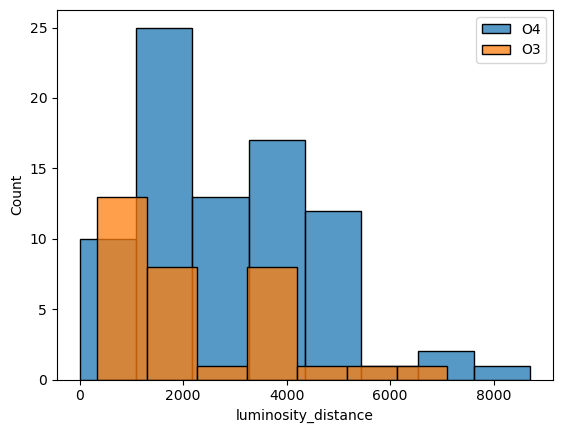

In [25]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="count", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="count", label="O3")
plt.legend()
plt.show()

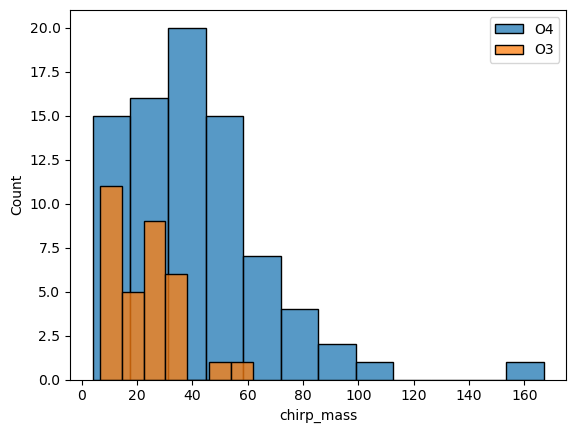

In [26]:
sns.histplot(O4_BBH, x="chirp_mass", stat="count", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="count", label="O3")
plt.legend()
plt.show()

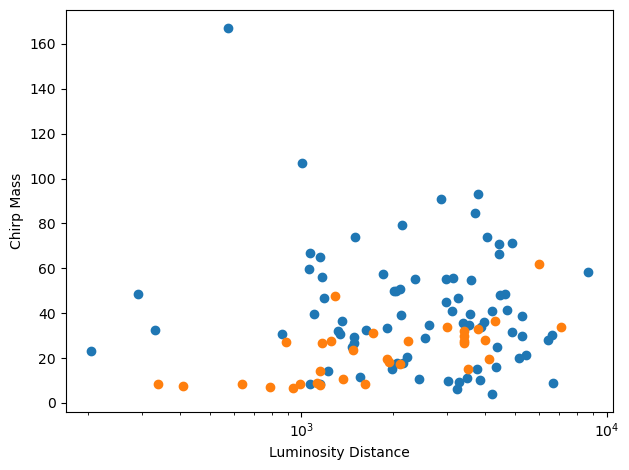

In [36]:
plt.scatter(O4_BBH["luminosity_distance"], O4_BBH["chirp_mass"], label="O4")
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["chirp_mass"], label="O3")
plt.xscale("log")
plt.xlabel("Luminosity Distance")
plt.ylabel("Chirp Mass")
#plt.colorbar()
plt.tight_layout()
plt.show()

In [28]:
O4_BBH

,eventid,chirp_mass,far,mass1,mass2,snr,spin1z,spin2z,template_duration,likelihood,group,group_name,chisq,total_mass,mass_ratio,mass_dos,network_matched_filter_snr,combined_far,M_tot,Luminosity Distance
0,S240109a,23.223027,7.346090e-09,36.045074,20.078638,10.434701,-0.278438,-0.278438,17.000000,17.739817,4,O4,NaN,56.123712,1.795195,0.284486,10.434701,7.346090e-09,56.123712,204.0
1,S240107b,49.904044,5.834248e-08,123.678850,29.247703,7.584719,0.355781,0.355781,0.000000,15.856870,4,O4,NaN,152.926553,4.228669,0.617493,7.584719,5.834248e-08,152.926553,2014.0
2,S240104bl,41.086045,3.554967e-17,54.746231,40.860004,14.819963,0.046406,0.046406,17.000000,34.786927,4,O4,NaN,95.606235,1.339849,0.145244,14.819963,3.554967e-17,95.606235,3102.0
3,S231231ag,20.645648,8.354028e-15,25.801163,21.829105,13.558277,-0.030937,-0.030937,17.000000,30.108771,4,O4,NaN,47.630268,1.181962,0.083394,13.558277,8.354028e-15,47.630268,2221.0
4,S231226av,39.445388,1.113964e-50,50.356155,40.860004,26.316437,-0.077344,-0.077344,17.000000,108.349365,4,O4,NaN,91.216159,1.232407,0.104106,26.316437,1.113964e-50,91.216159,3565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,S230609u,33.927120,1.004153e-08,47.358221,32.304928,5.666230,-0.536998,-0.536998,0.435059,0.000000,4,O4,NaN,79.663149,1.465975,0.188962,5.666230,1.004153e-08,79.663149,3861.0
77,S230608as,48.197517,1.369214e-10,76.482292,40.860004,8.160816,-0.046406,-0.046406,17.000000,19.398078,4,O4,NaN,117.342296,1.871813,0.303576,8.160816,1.369214e-10,117.342296,4468.0
78,S230606d,30.758823,1.140317e-08,60.675213,21.649523,5.412458,-0.443685,-0.443685,0.361249,0.000000,4,O4,NaN,82.324736,2.802612,0.474046,5.412458,1.140317e-08,82.324736,863.0
79,S230605o,14.078359,4.521287e-09,20.833027,12.706301,7.302712,-0.023161,-0.023161,1.561279,0.000000,4,O4,NaN,33.539328,1.639582,0.242304,7.302712,4.521287e-09,33.539328,1218.0


In [14]:
raw_o4["GW event"]

0       S230518h
1      S230520ae
2       S230522a
3       S230522n
4      S230601bf
         ...    
146    S241007bw
147     S241009l
148    S241009an
149    S241009em
150     S241011k
Name: GW event, Length: 150, dtype: object

In [26]:
sub_O3 = O3_BBH[(O3_BBH["mass2"] > 2.16) & (O3_BBH["snr"] > 5) & (O3_BBH["luminosity_distance"] < 8000)]

$R_{max}=\frac{M^N_{chirp}}{SNR_{threshold}}e^b$

$\rho(M_{chirp})=\frac{3f(M_{chirp})}{4\pi(R_{max}(M^N_{chirp}))^3}$

In [27]:
counts, range = np.histogram(sub_O3["chirp_mass"], bins=5)
mass_bins = (range[:-1]+range[1:])/2

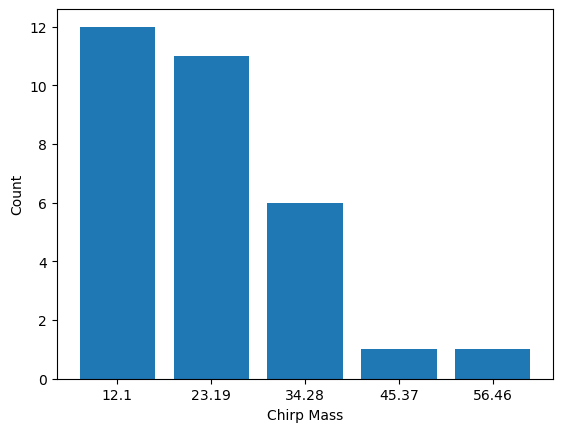

In [28]:
plt.bar([str(np.round(i,2)) for i in mass_bins],counts)
plt.xlabel("Chirp Mass")
plt.ylabel("Count")
plt.show()

In [29]:
N, b, SNR_threshold, O3_runtime = 0.85, 7.28, 5, 11
R_max = (mass_bins ** N) * np.exp(b) / SNR_threshold
rho = 3*counts/(4*np.pi*(O3_runtime/12.0)*((R_max*1.0e-4)**3))

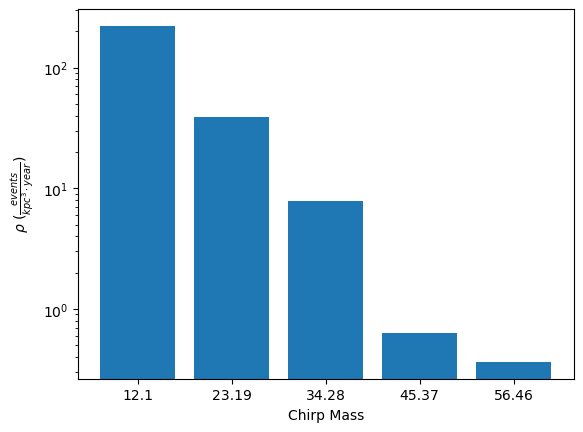

In [30]:
plt.bar([str(np.round(i,2)) for i in mass_bins],rho)
plt.yscale("log")
plt.ylabel("$\\rho$ ($\\frac{events}{kpc^3\cdot year}$)")
plt.xlabel("Chirp Mass")
plt.show()